## Standardized Cross-Validation Procedure

In [ ]:
# Standard packages
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Import any model-specific packages you need
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

**A. Data ingestion, holdout split, and preparation**

In [ ]:
# Read in data
data = pd.read_pickle('d_PCmd.pkl')

# Create holdout set and label X and Y columns. RANDOM STATE is 5, don't change
data_holdout = data.sample(frac = 0.2, random_state=5)
X_holdout = data_holdout.drop('s_sale_price', axis=1)
y_holdout = data_holdout['s_sale_price']

# Remove holdout set from training data and label X and Y columns
data_train = data.drop(test_holdout.index)
X = data_train.drop('s_sale_price', axis=1)
y = data_train['s_sale_price']

# Scale features (important since we are doing regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X_holdout = pd.DataFrame(scaler.fit_transform(X_holdout))

**B. Set KFolding parameters**

In [ ]:
# Set KFolding parameters. Random state is set at 5 - please don't change
kf = KFold(n_splits=7, shuffle=True, random_state=5)

## C. Skeleton code for Cross-validated model testing

In [ ]:
# Results from each fold are stored here:
fold_scores = []

# Cross-validation code begins here
for train_index, test_index in kf.split(X):
    
    # For each fold, define the X and y train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # INPUT: INPUT MODEL ALGORITHM HERE-------------------------------
    
    
    # INPUT: APPEND RESULTS FROM EACH FOLD TO fold_scores-------------
    fold_scores.append()
    
# Calculate the average accuracy score across all folds
cross_validated_score = np.mean(fold_scores)

print('Cross-validated accuracy score: {}'.format(cross_validated_score))

## END OF TEMPLATE

Below are examples. Delete if unneeded.

## Example: Ridge Regression

In [ ]:
# Results from each fold are stored here:
fold_scores = []

# Cross-validation code begins here
for train_index, test_index in kf.split(X):
    
    # For each fold, define the X and y train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # REPLACE: WRITE MODEL ALGORITHM HERE
    ridge = Ridge()
    ridge.fit(X_train, y_train)
        
    # REPLACE: APPEND RESULTS FROM EACH FOLD TO fold_scores
    fold_scores.append(ridge.score(X_test, y_test))
    
# Calculate the average accuracy score across all folds
cross_validated_score = np.mean(fold_scores)

print('Cross-validated accuracy score: {}'.format(cross_validated_score))

Cross-validated accuracy score: 0.5406483433074621


Seems sensible for a baseline. I'm going to re-do the cross-validation for ridge after searching for the best hyperparameter.

## Example: Ridge Regression hypermarameter search with Cross-validated accuracy

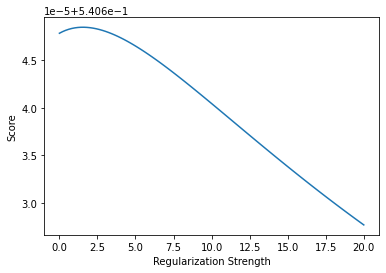

0.540648412393798


In [ ]:
# Define the range of hyperparameters to search:
ridge_alphas = np.linspace(0.001, 20, 100)

# Lists to store each hyperparameter and accuracy score:
ridge_alph = []
ridge_scores = []

# For each Hyperparameter value:
for i in ridge_alphas:
    # Set the model with the hyperparameter
    ridge = Ridge(alpha = i)
    
    # Results from each fold are stored here:
    fold_scores = []

    # Cross-validation code begins here
    for train_index, test_index in kf.split(X):

        # For each fold, define the X and y train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # REPLACE: WRITE MODEL ALGORITHM HERE
        ridge.fit(X_train, y_train)

        # REPLACE: APPEND RESULTS FROM EACH FOLD TO fold_scores
        fold_scores.append(ridge.score(X_test, y_test))

    # Store the hyperparameter and its score in the earlier lists:
    ridge_alph.append(i)
    ridge_scores.append(np.mean(fold_scores))

# Display cross-validated hyperparameter search results
plt.plot(ridge_alph, ridge_scores)
plt.xlabel('Regularization Strength')
plt.ylabel('Score')
plt.show()

print(max(ridge_scores))

## Example: Simple Linear Regression

In [ ]:
# Results from each fold are stored here:
fold_scores = []

# Cross-validation code begins here
for train_index, test_index in kf.split(X):
    
    # For each fold, define the X and y train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # REPLACE: WRITE MODEL ALGORITHM HERE
    reg = LinearRegression()
    reg.fit(X_train, y_train)
        
    # REPLACE: APPEND RESULTS FROM EACH FOLD TO fold_scores
    fold_scores.append(reg.score(X_test, y_test))
    
# Calculate the average accuracy score across all folds
cross_validated_score = np.mean(fold_scores)

print('Cross-validated accuracy score: {}'.format(cross_validated_score))

Cross-validated accuracy score: 0.5406477829077743
